説明 ： 使用的資料的來源是 疾病管制署資料開放平台的愛滋感染者死亡統計

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [37]:
df = pd.read_csv('https://od.cdc.gov.tw/chronic/3_DIE.csv')  
# 疾病管制署資料開放平台的 愛滋感染者死亡統計
# https://data.cdc.gov.tw/dataset/hiv_die/resource/1be6e4a5-0b4c-4883-9d61-ec3b7090f185

In [165]:
df

,死亡年份,死亡月份,縣市別,性別,死亡年齡分組,個案數
0,1986,3,台北市,男,25-34,1
1,1988,5,台南市,男,25-34,1
2,1988,5,新北市,女,35-49,1
3,1988,10,新北市,男,35-49,1
4,1988,11,台北市,男,35-49,1
5,1989,4,新北市,男,25-34,1
6,1989,4,新北市,男,50-64,1
7,1989,6,新北市,男,25-34,1
8,1989,8,台中市,男,35-49,1
9,1989,10,桃園市,男,25-34,1


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4110 entries, 0 to 4109
Data columns (total 6 columns):
死亡年份      4110 non-null int64
死亡月份      4110 non-null int64
縣市別       4110 non-null object
性別        4110 non-null object
死亡年齡分組    4110 non-null object
個案數       4110 non-null int64
dtypes: int64(3), object(3)
memory usage: 192.7+ KB


In [40]:
df.describe()

,死亡年份,死亡月份,個案數
count,4110.000000,4110.000000,4110.000000
mean,2007.958394,6.584915,1.350852
std,6.248950,3.471045,0.754006
min,1986.000000,1.000000,1.000000
25%,2004.000000,4.000000,1.000000
50%,2009.000000,7.000000,1.000000
75%,2013.000000,10.000000,1.000000
max,2017.000000,12.000000,7.000000


In [105]:
dfyearPp = df[['死亡年份','性別','個案數']]

In [134]:
dfyearM =dfyearPp[dfyearPp['性別']=='男']
dfyearW = dfyearPp[dfyearPp['性別']=='女']

In [135]:
dfyearM.tail()

,死亡年份,性別,個案數
4103,2017,男,1
4105,2017,男,1
4106,2017,男,1
4108,2017,男,3
4109,2017,男,1


In [136]:
dfyearM = dfyearM['個案數'].groupby(dfyearM['死亡年份'])
dfyearW = dfyearW['個案數'].groupby(dfyearW['死亡年份'])

In [137]:
dfyearM = dfyearM.sum()
dfyearW = dfyearW.sum()

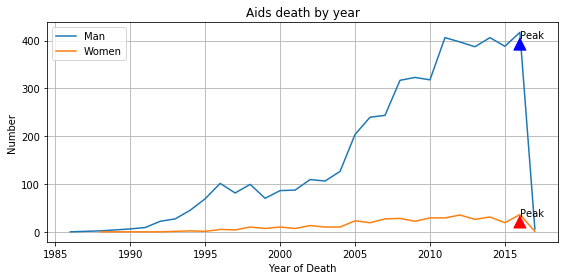

In [164]:
fig, ax = plt.subplots(figsize=(8,4))
dfyearM.plot(label = 'Man')
dfyearW.plot(label = 'Women')
ax.set( xlabel= 'Year of Death', ylabel = 'Number', title = 'Aids death by year')
plt.annotate('Peak', xy = (2016, 405), arrowprops={'color' : 'blue'})
plt.annotate('Peak', xy = (2016, 34), arrowprops={'color' : 'red'})
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()

注解 ：  因爲2017年後的資料還沒出來 所以看到人數突然下降。